# Regularized Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_table('ex5data1.txt', sep=',', header=None, names=['change_water_level', 'water_flowing_out'], dtype=np.float32)
data

,change_water_level,water_flowing_out
0,-15.936758,2.134310
1,-29.152979,1.173257
2,36.189548,34.359108
3,37.492188,36.837955
4,-48.058830,2.808965
5,-8.941458,2.121073
6,15.307793,14.710268
7,-34.706264,2.614184
8,1.389154,3.740172
9,-44.383759,3.731691


In [3]:
X_train = data.loc[:43,['change_water_level']].values
Y_train = data.loc[:43,['water_flowing_out']].values

X_test = data.loc[43:,['change_water_level']].values
Y_test = data.loc[43:,['water_flowing_out']].values

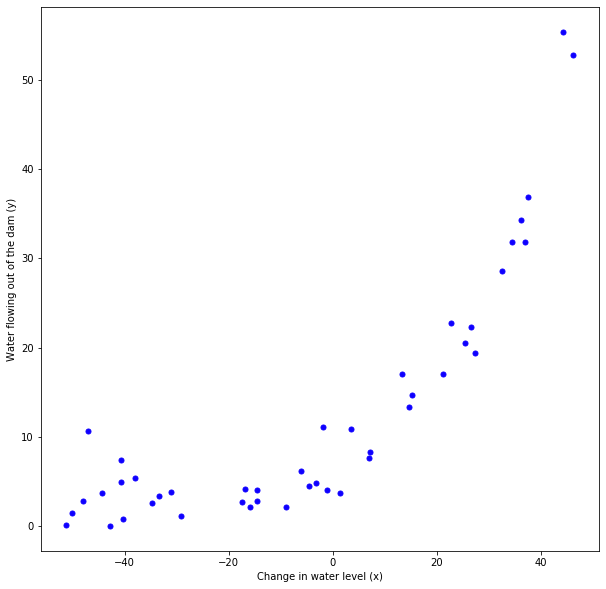

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
ax.plot(X_train, Y_train, marker='.', color='#0F00FF', markersize=10, linestyle='') 

In [5]:
model = Pipeline([('pf', PolynomialFeatures(degree=4, include_bias=False)),
                  ('r', Ridge(alpha=0., solver='svd'))])
                  
model.fit(X_train, Y_train.flatten()) 

Pipeline(memory=None,
         steps=[('pf',
                 PolynomialFeatures(degree=4, include_bias=False,
                                    interaction_only=False, order='C')),
                ('r',
                 Ridge(alpha=0.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='svd', tol=0.001))],
         verbose=False)

In [6]:
Y_pred = model.predict(X_train)
Y_pred

array([ 3.8854747,  3.2509518, 34.995644 , 37.085716 ,  3.4783344,
        4.6824293, 13.097511 ,  3.195382 ,  6.88873  ,  3.3337736,
        8.843056 , 18.75276  ,  3.818903 ,  4.0079026, 32.458336 ,
        3.4308538, 36.243736 ,  3.2435904,  5.454943 , 22.436306 ,
        3.2888823, 21.238235 ,  3.2200503, 23.274405 ,  5.7077165,
        6.0378423,  3.2441864,  3.5815887,  3.7675734,  7.5770507,
        8.872405 , 54.115887 , 12.666334 ,  3.2001147,  3.2071462,
        3.654931 ,  5.139496 , 17.449797 ,  3.2373161,  4.0113297,
       29.695396 , 11.946199 , 49.609818 ,  6.203041 ], dtype=float32)

In [7]:
Y_train

array([[ 2.1343105e+00],
       [ 1.1732566e+00],
       [ 3.4359108e+01],
       [ 3.6837955e+01],
       [ 2.8089650e+00],
       [ 2.1210725e+00],
       [ 1.4710268e+01],
       [ 2.6141844e+00],
       [ 3.7401717e+00],
       [ 3.7316914e+00],
       [ 7.6276588e+00],
       [ 2.2752428e+01],
       [ 4.1702018e+00],
       [ 4.0672626e+00],
       [ 3.1873068e+01],
       [ 1.0623656e+01],
       [ 3.1836021e+01],
       [ 4.9593697e+00],
       [ 4.4515986e+00],
       [ 2.2276318e+01],
       [-4.3873828e-05],
       [ 2.0503801e+01],
       [ 3.8583448e+00],
       [ 1.9365053e+01],
       [ 4.8837628e+00],
       [ 1.1097158e+01],
       [ 7.4617081e+00],
       [ 1.4769347e+00],
       [ 2.7191639e+00],
       [ 1.0926901e+01],
       [ 8.3487120e+00],
       [ 5.2781929e+01],
       [ 1.3357340e+01],
       [ 3.3168895e+00],
       [ 5.3976893e+00],
       [ 1.3042983e-01],
       [ 6.1925983e+00],
       [ 1.7088488e+01],
       [ 7.9950804e-01],
       [ 2.8247919e+00],


In [8]:
(1/2)*mean_squared_error(Y_train, Y_pred)

3.4339866638183594

In [9]:
(1/2)*mean_squared_error(Y_test, model.predict(X_test))

1.726138949394226

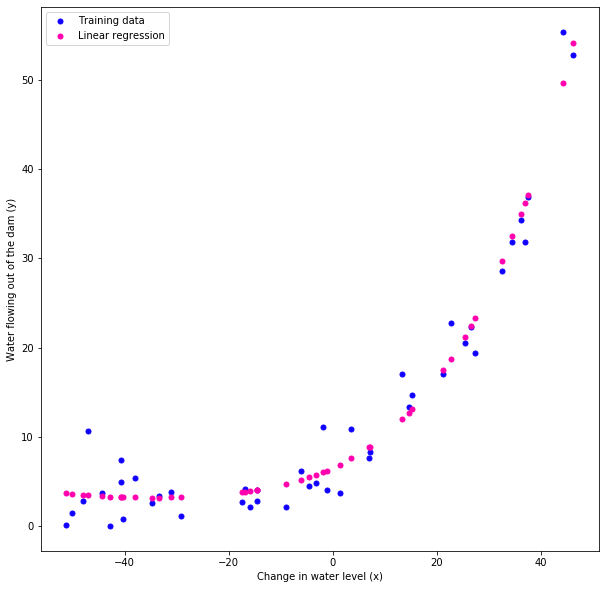

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
ax.plot(X_train, Y_train, marker='.', color='#0F00FF', markersize=10, linestyle='', label='Training data') 
ax.plot(X_train, Y_pred, marker='.', color='#FF00AE', markersize=10, linestyle='', label='Linear regression')
ax.legend()

-----

In [11]:
model = Pipeline([('pf', PolynomialFeatures(degree=4, include_bias=False)),
                  ('r', Ridge(alpha=1000., solver='svd'))])
                  
model.fit(X_train, Y_train.flatten()) 

Pipeline(memory=None,
         steps=[('pf',
                 PolynomialFeatures(degree=4, include_bias=False,
                                    interaction_only=False, order='C')),
                ('r',
                 Ridge(alpha=1000.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='svd', tol=0.001))],
         verbose=False)

In [12]:
Y_pred = model.predict(X_train)
Y_pred

array([ 4.4858265,  3.8715394, 34.659904 , 36.859154 ,  3.2406988,
        5.092414 , 12.49766  ,  3.6714253,  6.873587 ,  3.3406048,
        8.571372 , 17.999592 ,  4.4341583,  4.579669 , 32.003296 ,
        3.2663555, 35.97207  ,  3.4610295,  5.695931 , 21.690868 ,
        3.390585 , 20.48294  ,  3.800365 , 22.539635 ,  5.898375 ,
        6.166294 ,  3.4598856,  3.2009268,  4.3938494,  7.461163 ,
        8.597506 , 55.06124  , 12.0893   ,  3.7210374,  3.557541 ,
        3.1828346,  5.4467216, 16.711592 ,  3.473586 ,  4.5822806,
       29.128897 , 11.411779 , 50.20378  ,  6.3017936], dtype=float32)

In [13]:
Y_train

array([[ 2.1343105e+00],
       [ 1.1732566e+00],
       [ 3.4359108e+01],
       [ 3.6837955e+01],
       [ 2.8089650e+00],
       [ 2.1210725e+00],
       [ 1.4710268e+01],
       [ 2.6141844e+00],
       [ 3.7401717e+00],
       [ 3.7316914e+00],
       [ 7.6276588e+00],
       [ 2.2752428e+01],
       [ 4.1702018e+00],
       [ 4.0672626e+00],
       [ 3.1873068e+01],
       [ 1.0623656e+01],
       [ 3.1836021e+01],
       [ 4.9593697e+00],
       [ 4.4515986e+00],
       [ 2.2276318e+01],
       [-4.3873828e-05],
       [ 2.0503801e+01],
       [ 3.8583448e+00],
       [ 1.9365053e+01],
       [ 4.8837628e+00],
       [ 1.1097158e+01],
       [ 7.4617081e+00],
       [ 1.4769347e+00],
       [ 2.7191639e+00],
       [ 1.0926901e+01],
       [ 8.3487120e+00],
       [ 5.2781929e+01],
       [ 1.3357340e+01],
       [ 3.3168895e+00],
       [ 5.3976893e+00],
       [ 1.3042983e-01],
       [ 6.1925983e+00],
       [ 1.7088488e+01],
       [ 7.9950804e-01],
       [ 2.8247919e+00],


In [14]:
(1/2)*mean_squared_error(Y_train, model.predict(X_train))

3.5486457347869873

In [15]:
(1/2)*mean_squared_error(Y_test, model.predict(X_test))

1.6525154113769531

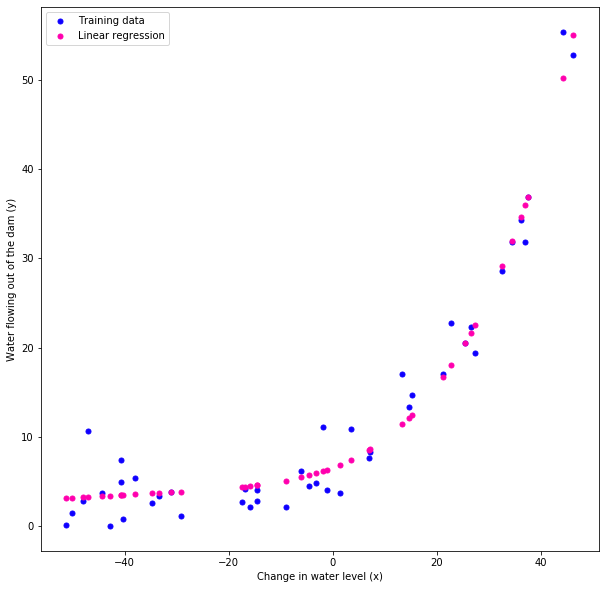

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
ax.plot(X_train, Y_train, marker='.', color='#0F00FF', markersize=10, linestyle='', label='Training data') 
ax.plot(X_train, Y_pred, marker='.', color='#FF00AE', markersize=10, linestyle='', label='Linear regression')
ax.legend()